Notebook to perform value iteration on Frozen Lake environment

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from utils import value_iter, find_opt_pol, find_opt_q, fancy_visual

In [2]:
# Initialize gym environment
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

# Obtaining environment details
print('Number of Actions:', env.action_space.n)
print('Number of States: ', env.observation_space.n)

Number of Actions: 4
Number of States:  16


In [3]:
# 1. Value iteration

gamma = 0.9 # discount factor 
theta = 0.001 # desired convergence error
opt_val, val_hist = value_iter(env, gamma, theta) # perform value iterations
print("Optimal value: ", opt_val.round(3)) # print optimal value

Optimal value:  [0.064 0.058 0.072 0.054 0.088 0.    0.111 0.    0.143 0.246 0.299 0.
 0.    0.379 0.639 0.   ]


Text(0, 0.5, 'Value error')

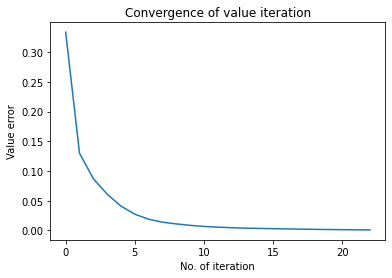

In [4]:
# 2. Plot showing convergence of value iteration

plt.plot(val_hist) # plot value history to show convergence
plt.title("Convergence of value iteration")
plt.xlabel("No. of iteration")
plt.ylabel("Value error")

In [5]:
# 3. Computing optimal policy

opt_pol = find_opt_pol(env, gamma, opt_val) # compute optimal policy for obtained optimal value
print("Optimal policy:", opt_pol)

Optimal policy: [0. 3. 0. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


Value Function [0.06428821 0.05807365 0.07231299 0.05356057 0.08830336 0.
 0.11127288 0.         0.14298808 0.24613328 0.29877497 0.
 0.         0.37905097 0.63860174 0.        ]
Policy [0. 3. 0. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


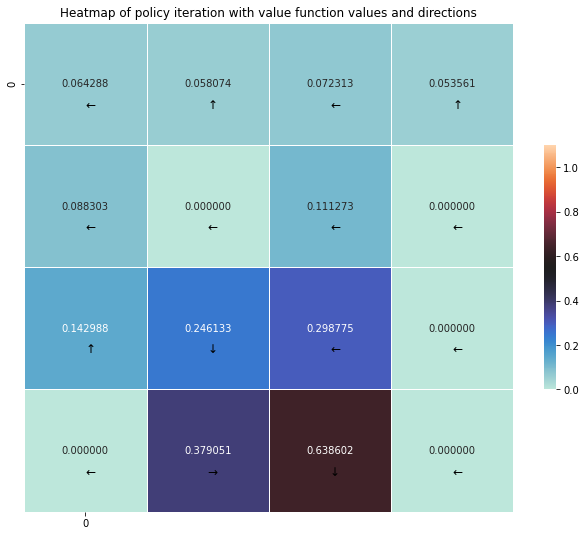

In [6]:
# 4. Visualize optimal value and optimal policy

fancy_visual(opt_val, opt_pol)

In [7]:
# 5. Find Q table

opt_q_fun = find_opt_q(env, gamma, opt_val) # compute  Q values for obtained optimal value
print(opt_q_fun.round(3))

[[0.065 0.063 0.063 0.056]
 [0.037 0.041 0.039 0.058]
 [0.072 0.067 0.071 0.055]
 [0.038 0.038 0.032 0.054]
 [0.089 0.069 0.062 0.046]
 [0.    0.    0.    0.   ]
 [0.111 0.09  0.111 0.022]
 [0.    0.    0.    0.   ]
 [0.069 0.117 0.1   0.143]
 [0.157 0.246 0.203 0.133]
 [0.299 0.265 0.225 0.107]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.188 0.305 0.379 0.265]
 [0.395 0.639 0.615 0.537]
 [0.    0.    0.    0.   ]]


In [8]:
# Save Q* for later use
np.save("q_star.npy", opt_q_fun)